In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')
plt.style.use("seaborn-darkgrid")

In [15]:
df_dict = {}
for filename in os.listdir('Datasets/'):
    company_name = filename.split(" ",1)[0]
    if(company_name=='USD-INR'):
        break
    filepath = 'Datasets/' + filename
    df_dict[company_name] = pd.read_csv(filepath)
    date_time = pd.to_datetime(df_dict[company_name]['Date'])
    df_dict[company_name].drop('Date',axis = 1,inplace = True)
    df_dict[company_name] = df_dict[company_name].set_index(date_time)
    df_dict[company_name] = df_dict[company_name].dropna()
    

In [38]:
print(df_dict)

{'Cognizant':                  Open       High        Low      Close   Volume
Date                                                           
2019-01-02  62.500000  63.810001  62.500000  63.090000  3045600
2019-01-03  62.360001  62.970001  61.009998  61.099998  3895700
2019-01-04  62.279999  63.799999  61.950001  63.700001  4885600
2019-01-07  63.349998  63.970001  62.799999  63.599998  3940400
2019-01-08  64.269997  64.430000  63.439999  64.320000  3427500
...               ...        ...        ...        ...      ...
2021-09-27  77.349998  78.290001  76.809998  78.029999  2884400
2021-09-28  77.709999  77.830002  76.180000  76.360001  2959500
2021-09-29  76.260002  76.559998  75.489998  75.580002  2062100
2021-09-30  75.870003  76.129997  74.019997  74.209999  2837000
2021-10-01  74.629997  75.680000  73.779999  75.269997  2395700

[694 rows x 5 columns], 'HCL':                    Open         High          Low        Close      Volume
Date                                           

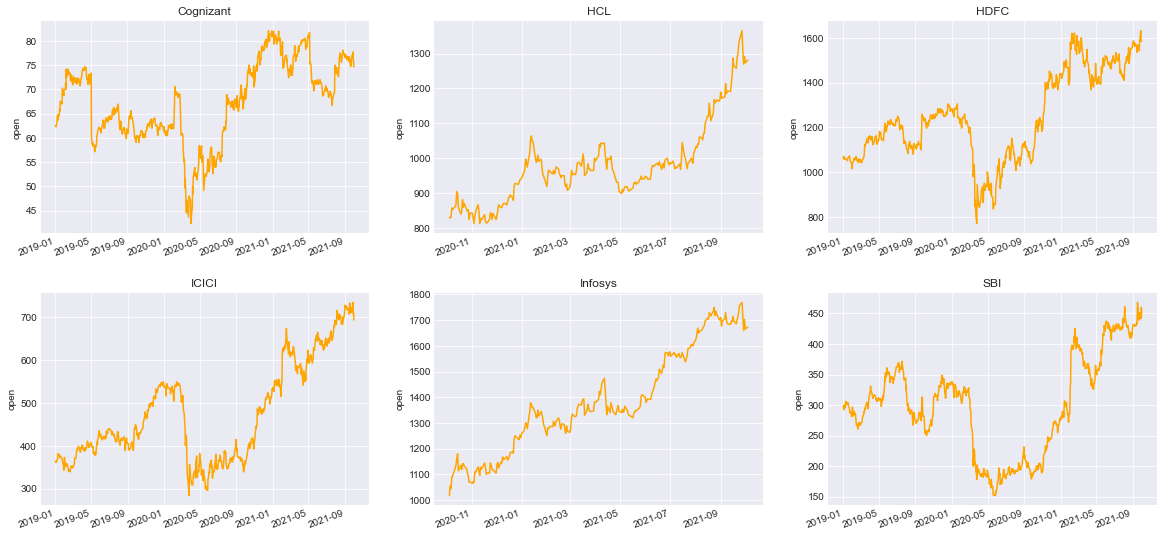

In [36]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2, hspace=0.28)

for i, company in enumerate(df_dict.keys(), 1):
    plt.subplot(3, 3, i)
    df_dict[company]['Open'].plot(color='orange')
    plt.ylabel('open')
    plt.xlabel(None)
    plt.xticks(rotation = 20)
    plt.title(company)

In [39]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

In [40]:
fig = go.Figure(data=[go.Candlestick(x=df_dict['Cognizant'].index,
                open=df_dict['Cognizant']['Open'],
                high=df_dict['Cognizant']['High'],
                low=df_dict['Cognizant']['Low'],
                close=df_dict['Cognizant']['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False, yaxis_title = 'Cognizant Stock')

fig.show()

In [94]:
fig = go.Figure(data=[go.Candlestick(x=df_dict['HCL'].index,
                open=df_dict['HCL']['Open'],
                high=df_dict['HCL']['High'],
                low=df_dict['HCL']['Low'],
                close=df_dict['HCL']['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False, yaxis_title = 'HCL Stock')

fig.show()

In [42]:
fig = go.Figure(data=[go.Candlestick(x=df_dict['HDFC'].index,
                open=df_dict['HDFC']['Open'],
                high=df_dict['HDFC']['High'],
                low=df_dict['HDFC']['Low'],
                close=df_dict['HDFC']['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False, yaxis_title = 'HDFC Stock')

fig.show()

In [43]:
fig = go.Figure(data=[go.Candlestick(x=df_dict['ICICI'].index,
                open=df_dict['ICICI']['Open'],
                high=df_dict['ICICI']['High'],
                low=df_dict['ICICI']['Low'],
                close=df_dict['ICICI']['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False, yaxis_title = 'ICICI Stock')

fig.show()

In [49]:
fig = go.Figure(data=[go.Candlestick(x=df_dict['Infosys'].index,
                open=df_dict['Infosys']['Open'],
                high=df_dict['Infosys']['High'],
                low=df_dict['Infosys']['Low'],
                close=df_dict['Infosys']['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False, yaxis_title = 'Infosys')

fig.show()

In [47]:
x1=df_dict['SBI']
fig = go.Figure(data=[go.Candlestick(x=x1.index,
                open=x1['Open'],
                high=x1['High'],
                low=x1['Low'],
                close=x1['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False, yaxis_title = 'SBI')

fig.show()

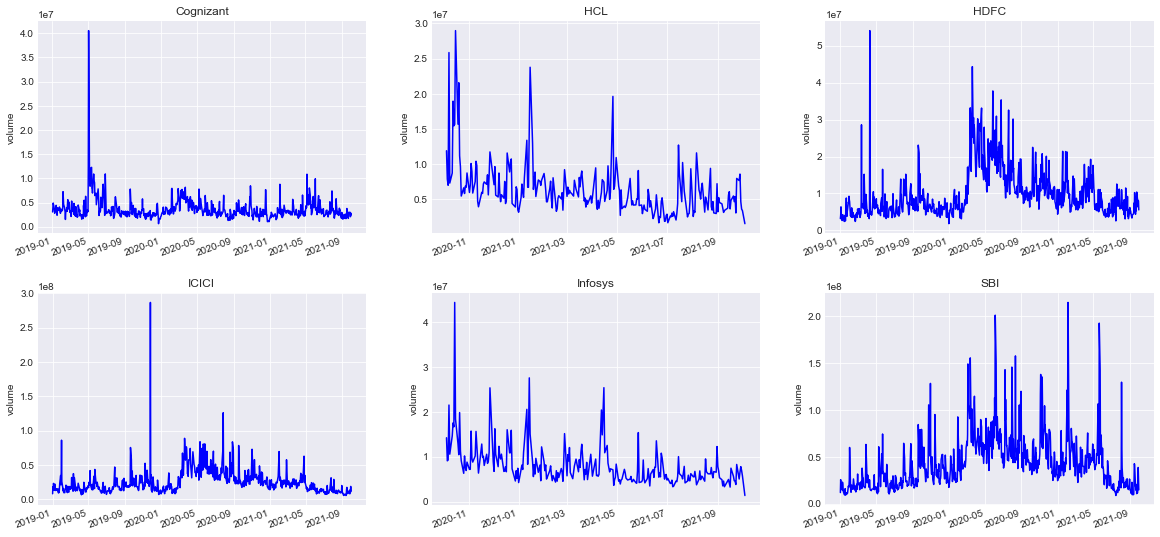

In [37]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2, hspace=0.28)

for i, company in enumerate(df_dict.keys(), 1):
    plt.subplot(3, 3, i)
    df_dict[company]['Volume'].plot(color='blue')
    plt.ylabel('volume')
    plt.xlabel(None)
    plt.xticks(rotation = 20)
    plt.title(company)

In [82]:
'''
Predicting close prize of Cognizant
'''
cognizant_len = len(df_dict['Cognizant'])

cognizant_train = df_dict['Cognizant'][:int(np.ceil(cognizant_len*0.95))]
cognizant_val = df_dict['Cognizant'][int(np.ceil(cognizant_len*0.95)):]
cognizant_ytrain = cognizant_train['Close']
cognizant_xtrain = cognizant_train.drop('Close', axis = 1)
from sklearn import linear_model
clf = linear_model.Ridge(alpha=0.1)

clf.fit(cognizant_xtrain, cognizant_ytrain)
cognizant_val['Predicted'] = clf.predict(cognizant_val.drop('Close',axis=1))
from sklearn.metrics import r2_score
print("R2 Score on Validation Data set: " + str(r2_score(cognizant_val['Close'], cognizant_val['Predicted'])))

R2 Score on Validation Data set: 0.8701345259976052


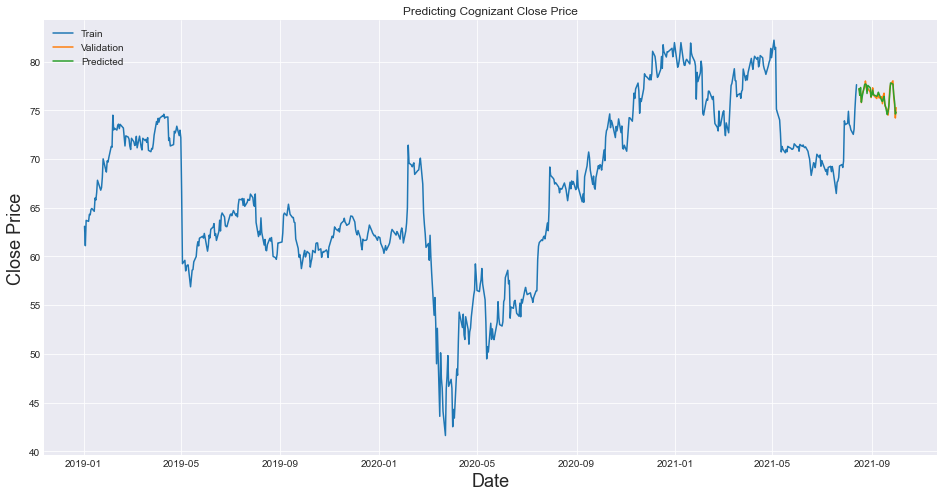

In [95]:
cognizant_len = len(df_dict['Cognizant'])

cognizant_train = df_dict['Cognizant'][:int(np.ceil(cognizant_len*0.95))]
cognizant_val = df_dict['Cognizant'][int(np.ceil(cognizant_len*0.95)):]
cognizant_ytrain = cognizant_train['Close']
cognizant_xtrain = cognizant_train.drop('Close', axis = 1)
from sklearn import linear_model
clf = linear_model.Ridge(alpha=0.1)
clf.fit(cognizant_xtrain, cognizant_ytrain)
cognizant_val['Predicted'] = clf.predict(cognizant_val.drop('Close',axis=1))
plt.figure(figsize=(16,8))
plt.title('Predicting Cognizant Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.locator_params(axis='x', nbins=10)
plt.plot(cognizant_train.index,cognizant_train['Close'])
plt.plot(cognizant_val[['Close', 'Predicted']])
plt.legend(['Train', 'Validation', 'Predicted'], loc='upper left')
plt.show()

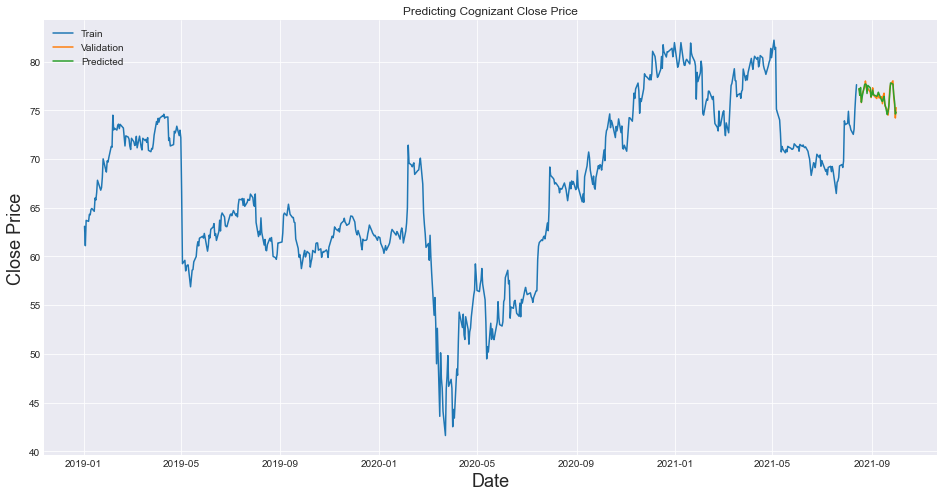

In [71]:
plt.figure(figsize=(16,8))
plt.title('Predicting Cognizant Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.locator_params(axis='x', nbins=10)
plt.plot(cognizant_train.index,cognizant_train['Close'])
plt.plot(cognizant_val[['Close', 'Predicted']])
plt.legend(['Train', 'Validation', 'Predicted'], loc='upper left')
plt.show()

In [96]:
'''
Predicting close prize of HCL
'''
HCL_len = len(df_dict['HCL'])
HCL_train = df_dict['HCL'][:int(np.ceil(HCL_len*0.95))]
HCL_val = df_dict['HCL'][int(np.ceil(HCL_len*0.95)):]
HCL_ytrain = HCL_train['Close']
HCL_xtrain = HCL_train.drop('Close', axis = 1)
clf = linear_model.Ridge(alpha=0.1)
clf.fit(HCL_xtrain, HCL_ytrain)
HCL_val['Predicted'] = clf.predict(HCL_val.drop('Close',axis=1))

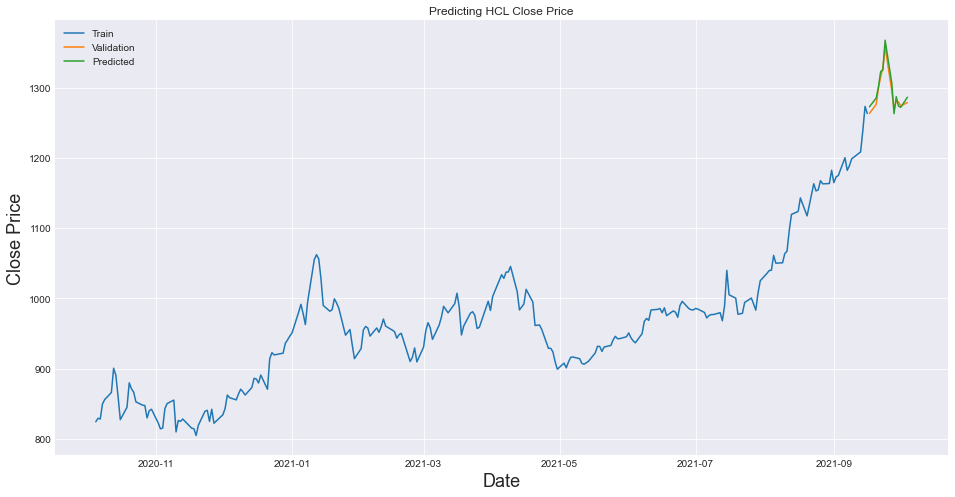

In [97]:
plt.figure(figsize=(16,8))
plt.title('Predicting HCL Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.locator_params(axis='x', nbins=10)
plt.plot(HCL_train.index,HCL_train['Close'])
plt.plot(HCL_val[['Close', 'Predicted']])
plt.legend(['Train', 'Validation', 'Predicted'], loc='upper left')
plt.show()

In [98]:
'''
Predicting close prize of HDFC
'''
HDFC_len = len(df_dict['HDFC'])

HDFC_train = df_dict['HDFC'][:int(np.ceil(HDFC_len*0.95))]
HDFC_val = df_dict['HDFC'][int(np.ceil(HDFC_len*0.95)):]
HDFC_ytrain = HDFC_train['Close']
HDFC_xtrain = HDFC_train.drop('Close', axis = 1)
clf = linear_model.Ridge(alpha=0.1)
clf.fit(HDFC_xtrain, HDFC_ytrain)
HDFC_val['Predicted'] = clf.predict(HDFC_val.drop('Close',axis=1))

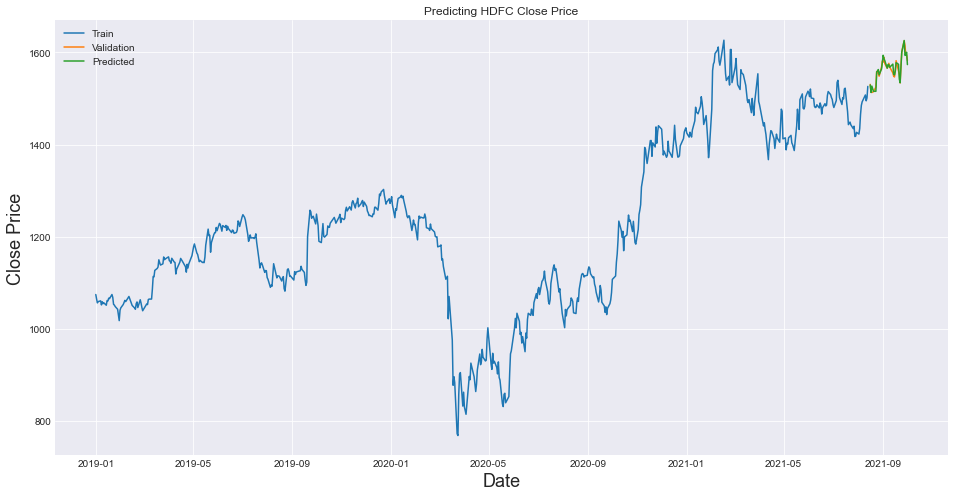

In [99]:
plt.figure(figsize=(16,8))
plt.title('Predicting HDFC Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.locator_params(axis='x', nbins=10)
plt.plot(HDFC_train.index,HDFC_train['Close'])
plt.plot(HDFC_val[['Close', 'Predicted']])
plt.legend(['Train', 'Validation', 'Predicted'], loc='upper left')
plt.show()

In [100]:
'''
Predicting close prize of ICICI
'''
ICICI_len = len(df_dict['ICICI'])

ICICI_train = df_dict['ICICI'][:int(np.ceil(ICICI_len*0.95))]
ICICI_ytrain = ICICI_train['Close']
ICICI_xtrain = ICICI_train.drop('Close', axis = 1)

ICICI_val = df_dict['ICICI'][int(np.ceil(ICICI_len*0.95)):]
clf = linear_model.Ridge(alpha=0.1)
clf.fit(ICICI_xtrain, ICICI_ytrain)
ICICI_val['Predicted'] = clf.predict(ICICI_val.drop('Close',axis=1))

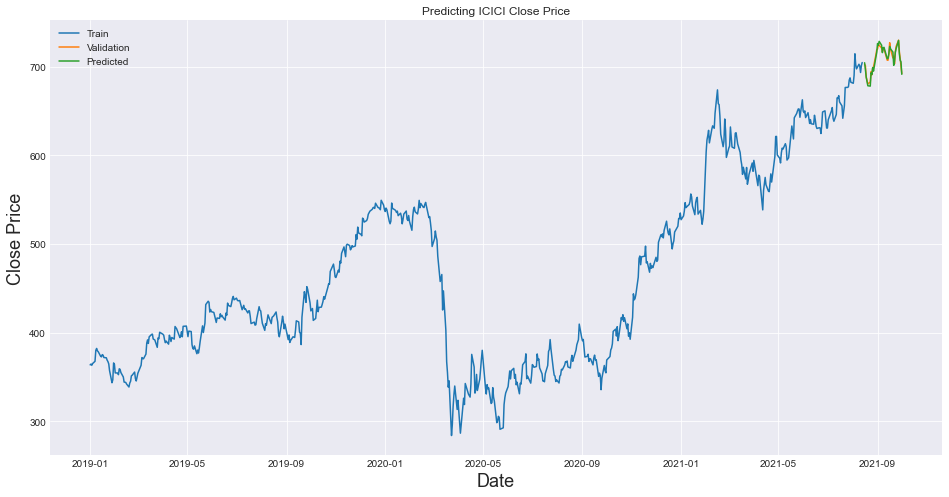

In [101]:
plt.figure(figsize=(16,8))
plt.title('Predicting ICICI Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.locator_params(axis='x', nbins=10)
plt.plot(ICICI_train.index,ICICI_train['Close'])
plt.plot(ICICI_val[['Close', 'Predicted']])
plt.legend(['Train', 'Validation', 'Predicted'], loc='upper left')
plt.show()

In [103]:
HDFC_len = len(df_dict['Infosys'])

HDFC_train = df_dict['Infosys'][:int(np.ceil(HDFC_len*0.95))]
HDFC_val = df_dict['Infosys'][int(np.ceil(HDFC_len*0.95)):]
HDFC_ytrain = HDFC_train['Close']
HDFC_xtrain = HDFC_train.drop('Close', axis = 1)
clf = linear_model.LinearRegression()
clf.fit(HDFC_xtrain, HDFC_ytrain)
HDFC_val['Predicted'] = clf.predict(HDFC_val.drop('Close',axis=1))

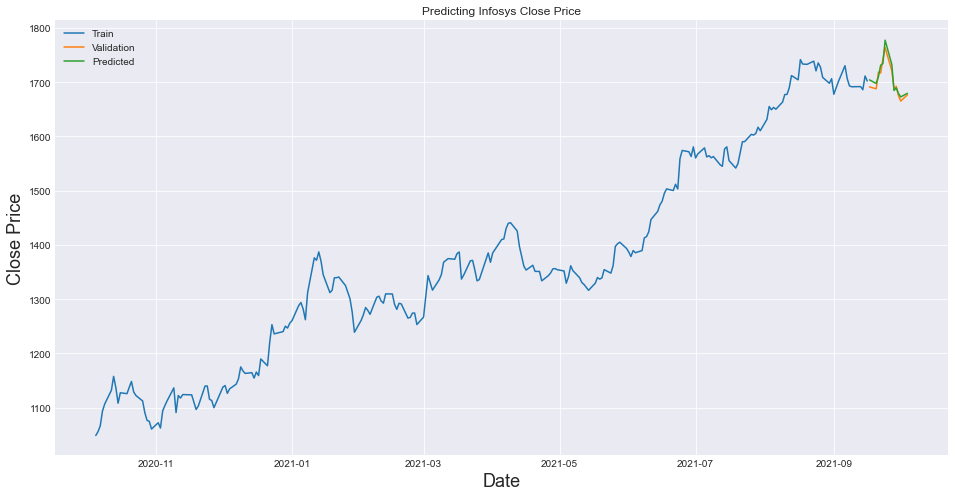

In [104]:
plt.figure(figsize=(16,8))
plt.title('Predicting Infosys Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.locator_params(axis='x', nbins=10)
plt.plot(HDFC_train.index,HDFC_train['Close'])
plt.plot(HDFC_val[['Close', 'Predicted']])
plt.legend(['Train', 'Validation', 'Predicted'], loc='upper left')
plt.show()

In [106]:
HDFC_len = len(df_dict['SBI'])

HDFC_train = df_dict['SBI'][:int(np.ceil(HDFC_len*0.95))]
HDFC_val = df_dict['SBI'][int(np.ceil(HDFC_len*0.95)):]
HDFC_ytrain = HDFC_train['Close']
HDFC_xtrain = HDFC_train.drop('Close', axis = 1)
clf = linear_model.LinearRegression()
clf.fit(HDFC_xtrain, HDFC_ytrain)
HDFC_val['Predicted'] = clf.predict(HDFC_val.drop('Close',axis=1))


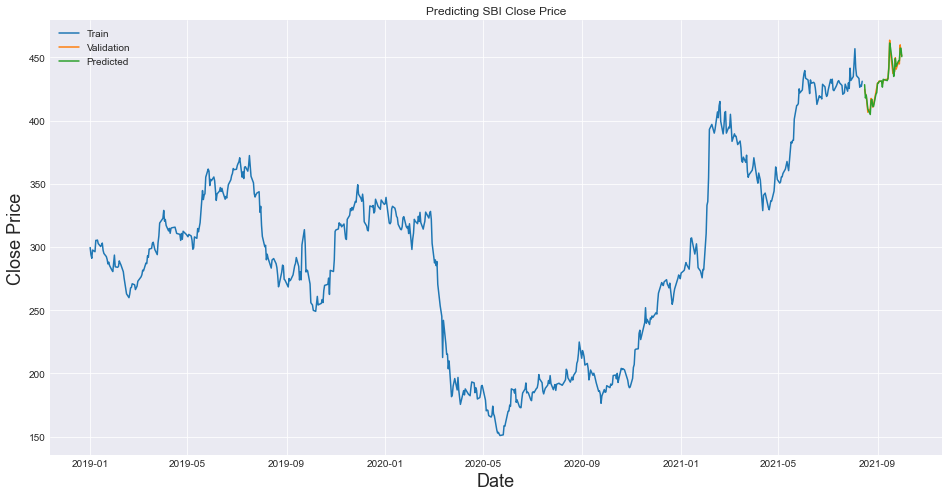

In [107]:
plt.figure(figsize=(16,8))
plt.title('Predicting SBI Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.locator_params(axis='x', nbins=10)
plt.plot(HDFC_train.index,HDFC_train['Close'])
plt.plot(HDFC_val[['Close', 'Predicted']])
plt.legend(['Train', 'Validation', 'Predicted'], loc='upper left')
plt.show()